In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt

In [43]:
# Fixa uma semente para reprodutibilidade
# A funcao seed garante que os dados serao sempre os mesmos

np.random.seed(0)

In [44]:
# Gerarando dados para duas classes
# Para a primeira classe (X_class1) e (X_class2), sao criadas 500 amostras bidimensionais, no eixos x e y (2, 2) e (-2, -2). A função randn gera valores aleatórios para a distribuição normal.

n_samples = 500
X_class1 = np.random.randn(n_samples, 2) + np.array([2, 2])
X_class2 = np.random.randn(n_samples, 2) + np.array([-2, -2])

In [45]:
# Combinacao das duas classes em um array (O nome disso é stacking)
# Esses dados serao usados como a antrada no modelo
# O metodo vstack empilha array verticalmente

X_train = np.vstack((X_class1, X_class2)).astype(np.float32)

In [46]:
# Cria um array de rótulos para cada classe. A primeira metade dos dados é da classe 0, e a segunda metade é da classe 1.
# zeros(n_samples) cria um array de 500 zeros (classe 0)
# ones(n_samples) cria um array de 500 uns (classe 1)
# hstack empilha estes arrays horizontalmente para formar o vetor final de rótulos.

y_train = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

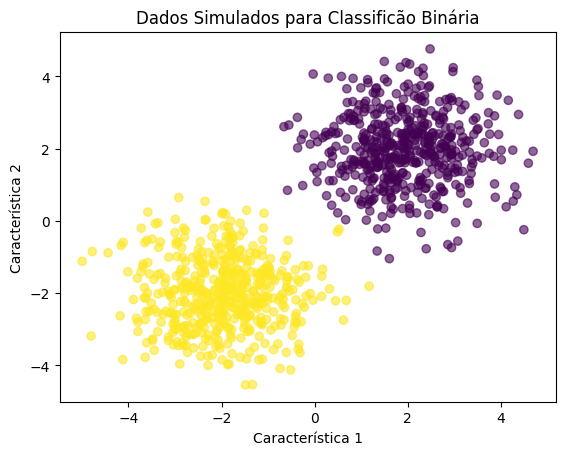

In [47]:
# Cria um gráfico de dispersão para visualizar os dados de entrada.
# Cada ponto é colorido com base no rótulo da classe, para ajudar a ver as duas classes distintas.

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.title('Dados Simulados para Classificão Binária')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Aplicando um modelo aos dados



In [48]:
# Aqui é criada uma rede neural simples usando a API tf.keras.Sequential.
# Cada camada "Dense" representa uma camada densa, onde cada neurônio está
# conectado a todos os neurônios da camada anterior.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)), # Primeira camada com 10 neurônios e função de ativação ReLU
    tf.keras.layers.Dense(5, activation='relu'),                    # Segunda camada com 5 neurônios e ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')                  # Última camada com 1 neurônio e função de ativação Sigmoid

])

Compilando o modelo

In [49]:
# 1. Adam: Algoritmo de otimização que ajusta os pesos da rede. É um otimizador popular e eficiente.
# 2. Binary Crossentropy: Função de perda para problemas de classificação binária.
# 3. Accuracy: Métrica para monitorar a porcentagem de previsões corretas.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
#Finalmente, treinamos o modelo. Aqui, definimos:
# - `epochs=50`: Número de passagens completas pelo conjunto de dados.
# - `batch_size=32`: Número de amostras antes de atualizar os parâmetros do modelo. (esse lote sao dados selecionados que sao verdadeiros positivos e sao usados para penalizar o modelo)
# - `validation_split=0.2`: Reserva 20% dos dados para validação durante o treinamento.

# O método `fit` treina o modelo nos dados. Durante o treinamento, o TensorFlow exibirá
# a perda e a precisão tanto para o conjunto de treinamento quanto para o conjunto de validação.

history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/50


I0000 00:00:1728237894.169692    1819 service.cc:146] XLA service 0x7f1e9c005e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728237894.169724    1819 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-10-06 14:04:54.190247: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-06 14:04:54.286024: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 1/25 ━━━━━━━━━━━━━━━━━━━━ 23s 978ms/step - accuracy: 0.6562 - loss: 0.6348

I0000 00:00:1728237894.783471    1819 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5654 - loss: 0.6459 - val_accuracy: 0.0800 - val_loss: 0.8171
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.4395 - val_accuracy: 0.8300 - val_loss: 0.6132
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.3259 - val_accuracy: 0.9800 - val_loss: 0.4487
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.2195 - val_accuracy: 0.9900 - val_loss: 0.3327
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.1709 - val_accuracy: 0.9950 - val_loss: 0.2493
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.1421 - val_accuracy: 0.9950 - val_loss: 0.1893
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.1079 - val_accuracy: 0.9950 - val_loss: 0.1491
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0823 - val_accuracy: 0.9950 - val_loss: 0.1200
Ep

Visualizando os Resultados do Treinamento

In [52]:
# O histórico de treinamento está salvo na variável `history`. Podemos usá-lo para
# visualizar a precisão e a perda ao longo das épocas de treinamento.

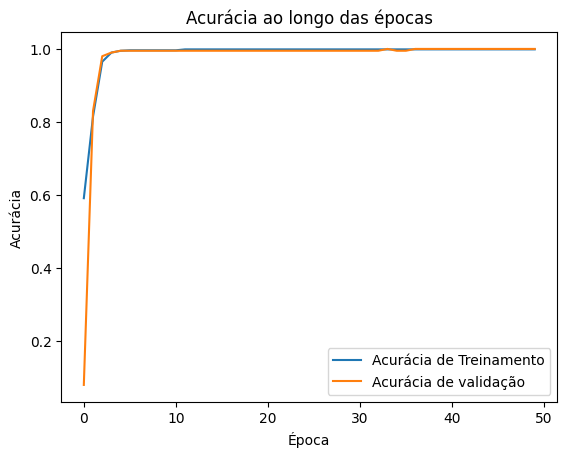

In [53]:
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.title('Acurácia ao longo das épocas')
plt.show()

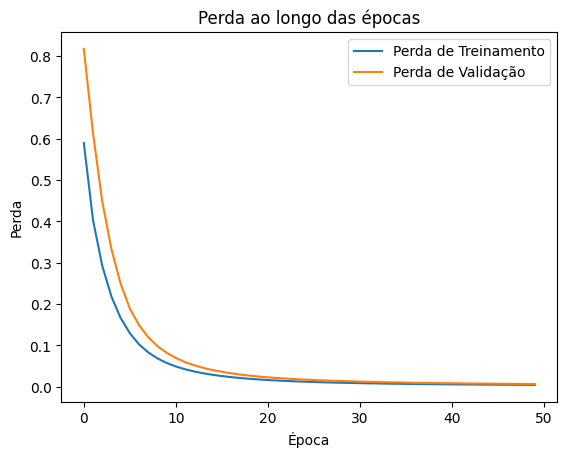

In [54]:
# Visualizar a perda durante o treinamento
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')
plt.title('Perda ao longo das épocas')
plt.show()

Fazendo predições

In [58]:
# Agora com o modelo treinado é possivel realizar previsões(predicoes) para uma determinada entrada.
# O metodo 'Predict' gera uma probabilidade para cada amostra.
# convertendo essas probabilidades para 0 ou 1 usando o limiar(intervalo) de 0.5.

predictions = (model.predict(X_train) > 0.5).astype("int32")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


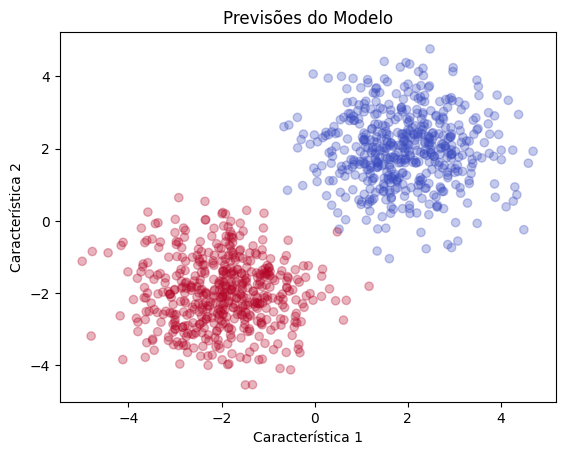

In [64]:
# Visualizando as previsões feitas pelo modelo em um gráfico de dispersão

plt.scatter(X_train[:, 0], X_train[:, 1], c=predictions.flatten(), cmap='coolwarm', alpha=0.3)
plt.title('Previsões do Modelo')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Notas interessantes:

As cores dos graficos variam de varias formas, voce deve ter notada o parametro cmap(colormaps), basicamente ele mostra define a cor das classes ou variacao de cor em realcao a escala dos dados.

# Tipos de Colormaps no Matplotlib

## 1. Perceptually Uniform Sequential
Esses colormaps são ideais para representar dados com uma **variação contínua** ou um **gradiente**. Eles são projetados para que a percepção humana interprete as mudanças de cor de maneira consistente ao longo de toda a escala, o que é útil para visualizar dados em tons contínuos, como intensidade ou temperatura.

- **Exemplos**: `'viridis'`, `'plasma'`, `'inferno'`, `'magma'`, `'cividis'`
- **Uso indicado**: Representação de dados contínuos, como:
  - Temperaturas
  - Densidade
  - Gradientes de intensidade
- **Dicas**:
  - `'viridis'`: Um dos mais usados, variando do roxo ao amarelo, com um bom contraste. Bom para dados geológicos e meteorológicos.
  - `'plasma'`: Varia do roxo ao amarelo brilhante, é bom para realçar as diferenças em uma escala contínua.
  - `'cividis'`: Similar ao viridis, mas otimizado para daltonismo.

---

## 2. Sequential Colormaps
Esses colormaps são **monotônicos** e geralmente variam do claro ao escuro (ou vice-versa). São apropriados para representar dados que possuem uma ordem natural, como magnitudes.

- **Exemplos**: `'Greys'`, `'Blues'`, `'Oranges'`, `'Purples'`, `'Reds'`
- **Uso indicado**: Quando os dados são escalados de **baixa para alta intensidade**.
  - Representação de dados demográficos
  - Mapas de calor
  - Curvas de densidade
- **Dicas**:
  - `'Blues'`, `'Greens'`: Bons para mapas que mostram intensidades ou quantidades, como densidade de população.
  - `'Greys'`: Útil para mostrar intensidade sem influenciar o viés de cores.

---

## 3. Diverging Colormaps
Os colormaps divergentes têm **duas cores diferentes**, que se encontram no meio. São úteis para representar dados que possuem um **ponto central** ou **valor neutro** em torno do qual os dados divergem, como desvio da média.

- **Exemplos**: `'coolwarm'`, `'RdBu'`, `'BrBG'`, `'PiYG'`, `'PRGn'`
- **Uso indicado**: Quando os dados se afastam em **duas direções opostas** a partir de um ponto central.
  - Representação de anomalias (ex: variações de temperatura acima e abaixo da média)
  - Representações de ganho/perda, positivo/negativo
  - Gráficos de correlação
- **Dicas**:
  - `'coolwarm'`: Vai do azul ao vermelho, útil para diferenças de temperatura.
  - `'RdBu'`: Vai do vermelho ao azul, excelente para exibir correlações ou comparações de duas direções opostas.
  - `'BrBG'`: Vai do marrom ao verde, que é bom para dados ambientais.

---

## 4. Cyclic Colormaps
Esses colormaps são **cíclicos**, com a mesma cor em ambas as extremidades da escala. São adequados para dados que representam **fenômenos cíclicos** como ângulos, direções e horários.

- **Exemplos**: `'twilight'`, `'hsv'`, `'twilight_shifted'`
- **Uso indicado**: Dados cíclicos como:
  - Ângulos (em graus ou radianos)
  - Direção do vento
  - Períodos de tempo (ex: 0-24h)
- **Dicas**:
  - `'twilight'`: Colormap discreto e neutro que varia de roxo claro a cinza claro, ótimo para representar ciclos suaves.
  - `'hsv'`: Muda de cor em torno de um círculo, ideal para ângulos.

---

## 5. Qualitative Colormaps
Esses colormaps possuem **categorias distintas** e são ideais para representar dados que possuem **categorias sem ordem** ou **variáveis discretas**, onde as cores não precisam representar uma sequência.

- **Exemplos**: `'Set1'`, `'Set2'`, `'Paired'`, `'Accent'`, `'Dark2'`
- **Uso indicado**: Dados categóricos ou grupos, como:
  - Grupos de pessoas ou tipos de objetos
  - Categorias nominais
- **Dicas**:
  - `'Set1'`: Colormap com cores brilhantes e bem definidas, ideal para representar grupos distintos.
  - `'Paired'`: Contém cores pareadas, útil para comparar dois conjuntos de categorias.
  - `'Dark2'`: Usa cores mais escuras e é uma boa escolha para gráficos com um fundo claro.

---

## Considerações ao Escolher um Colormap
- **Contraste e Visibilidade**: Considere o fundo do gráfico. Colormaps claros funcionam melhor em fundos escuros e vice-versa.
- **Interpretação**: Se os dados possuem um ponto central (como zero), colormaps divergentes são preferíveis. Se os dados são apenas sequenciais (do menor ao maior), colormaps sequenciais funcionam melhor.
- **Acessibilidade**: Colormaps perceptualmente uniformes e otimizados para daltonismo, como `viridis`, `plasma` e `cividis`, são preferíveis para garantir que mais pessoas possam interpretar corretamente o gráfico.
